## Double Qubits Gates

In [64]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from math import pi
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit.tools.visualization import circuit_drawer
from qiskit import BasicAer,execute
from qiskit.visualization import plot_bloch_multivector

### 1. Controlled Phase Rotation

In [65]:
def circuit():
    qc = QuantumCircuit(2,2)
    qc.x(0)
    qc.barrier()
    qc.cu1(pi/4,0,1)
    qc.barrier()
    return qc

#### 1.1 Circuit Diagram

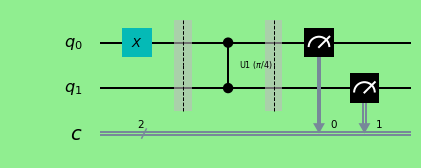

In [66]:
qc = circuit()
qc.measure([0,1],[0,1])
style = {'backgroundcolor': 'lightgreen'}
qc.draw(output='mpl', style = style)

#### 1.2 Qubit State Vecors

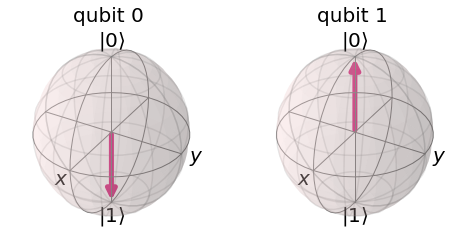

In [73]:
qc = circuit()
backend = BasicAer.get_backend('statevector_simulator')
job = execute(qc,backend).result()
plot_bloch_multivector(job.get_statevector(qc))

#### 1.3 Unitary Matrix

In [70]:
qc = circuit()
backend = BasicAer.get_backend('unitary_simulator')
job = execute(qc, backend)
Matrix = job.result().get_unitary(qc, decimals=3)
Matrix

array([[0.   +0.j   , 1.   -0.j   , 0.   +0.j   , 0.   +0.j   ],
       [1.   +0.j   , 0.   +0.j   , 0.   +0.j   , 0.   +0.j   ],
       [0.   +0.j   , 0.   +0.j   , 0.   +0.j   , 1.   -0.j   ],
       [0.   +0.j   , 0.   +0.j   , 0.707+0.707j, 0.   +0.j   ]])

### 2. U operator and control phase gate

$ (I \otimes I \otimes U_3)  \times (I \otimes CU_1 ) \times (I \otimes U_3 \otimes I)  \times (CU_1 \otimes I) \times (U_3 \otimes I \otimes I)$

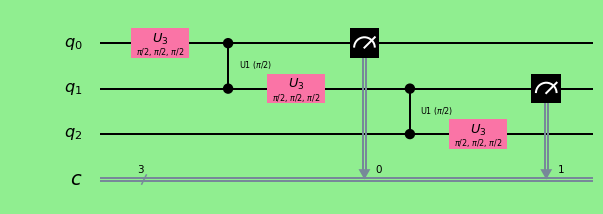

In [34]:
qc = QuantumCircuit(3,3)
qc.u3(pi/2,pi/2,pi/2,0)
qc.cu1(pi/2,0, 1)
qc.u3(pi/2,pi/2,pi/2,1)
qc.cu1(pi/2,1, 2)
qc.u3(pi/2,pi/2,pi/2,2)
qc.measure([0,1],[0,1])

style = {'backgroundcolor': 'lightgreen'}
qc.draw(output='mpl', style = style)

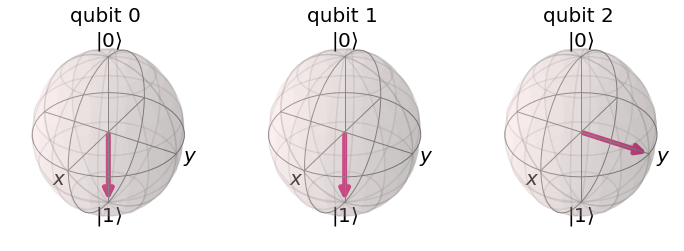

In [35]:
simulator = BasicAer.get_backend('statevector_simulator')
job = execute(qc,simulator).result()
plot_bloch_multivector(job.get_statevector(qc))

In [12]:
job = execute(qc, backend)
job.result().get_unitary(qc, decimals=3)

array([[ 0.354+0.j   ,  0.   -0.354j,  0.   -0.354j, -0.354+0.j   ,
         0.   -0.354j, -0.354+0.j   , -0.354+0.j   ,  0.   +0.354j],
       [ 0.   +0.354j, -0.354+0.j   ,  0.   +0.354j, -0.354+0.j   ,
         0.354+0.j   ,  0.   +0.354j,  0.354+0.j   ,  0.   +0.354j],
       [ 0.   +0.354j,  0.354+0.j   , -0.354+0.j   ,  0.   +0.354j,
         0.   +0.354j,  0.354+0.j   , -0.354+0.j   ,  0.   +0.354j],
       [-0.354+0.j   ,  0.   -0.354j,  0.354+0.j   ,  0.   +0.354j,
        -0.354+0.j   ,  0.   -0.354j,  0.354+0.j   ,  0.   +0.354j],
       [ 0.   +0.354j,  0.354+0.j   ,  0.354+0.j   ,  0.   -0.354j,
        -0.354+0.j   ,  0.   +0.354j,  0.   +0.354j,  0.354+0.j   ],
       [-0.354+0.j   ,  0.   -0.354j, -0.354+0.j   ,  0.   -0.354j,
         0.   -0.354j,  0.354+0.j   ,  0.   -0.354j,  0.354+0.j   ],
       [-0.354+0.j   ,  0.   +0.354j,  0.   -0.354j, -0.354+0.j   ,
         0.354+0.j   ,  0.   -0.354j,  0.   +0.354j,  0.354+0.j   ],
       [ 0.   -0.354j,  0.354+0.j   ,  0.

------------